In [58]:
import os,sys; sys.path.insert(0,'/Users/ryan/github/lltk/lltk/corpus/epistolary')
import os,sys; sys.path.insert(0,'/Users/ryan/github/abslithist')
from epistolary import *
from abslithist import *

In [76]:
for t in Corpus('chadwyck').au.Defoe:
    print(t.id,t.title)

Eighteenth-Century_Fiction/defoe.06 Moll Flanders (1722)
Eighteenth-Century_Fiction/defoe.04 Journal of the Plague Year (1722)
Eighteenth-Century_Fiction/defoe.05 Memoirs of a Cavalier (1720)
Eighteenth-Century_Fiction/defoe.07 Robinson Crusoe (1719)
Eighteenth-Century_Fiction/defoe.08 Roxana (1724)
Eighteenth-Century_Fiction/defoe.03 The Farther Adventures of Robinson Crusoe (1719)
Eighteenth-Century_Fiction/defoe.01 Captain Singleton (1720)
Eighteenth-Century_Fiction/defoe.02 Colonel Jack (1723)


In [123]:
meta=Corpus('canon_fiction').meta
meta[meta.author.str.contains('James, Henry')]

[07:41:07] lltk.corpus.corpus.metadata():296: Returning dataframe of (1804, 31) dimensions


,author,title,year,canon_genre,canon_genre2,canon_name,major_genre,setting_elson,year_trans,author_id,...,name_middle,name_title,nation,note,notes,num_words,ocr_accuracy,source,subcorpus,_addr
id,,,,,,,,,,,,,,,,,,,,,
chadwyck.James.A_Passionate_Pilgrim_and.0489,"James, Henry, 1843-1916","A Passionate Pilgrim, and Other Tales. (1875)",1875,James,James,,Novel,,NaN,NaN,...,,,American,,,113357.0,0.982507,,Early_American_Fiction,_canon_fiction/chadwyck.James.A_Passionate_Pil...
markmark.James.The_Portrait_of_a_Lady.1520,"James, Henry",The Portrait of a Lady,1881,James,James,,Novel,urban,NaN,NaN,...,,,American,,serialized 1880-81,266887.0,0.817769,,,_canon_fiction/markmark.James.The_Portrait_of_...
markmark.James.The_Bostonians.1518,"James, Henry",The Bostonians,1886,James,James,,Novel,,NaN,NaN,...,,,American,,serialized in The Century Magazine 1885-1886,181315.0,0.831663,,,_canon_fiction/markmark.James.The_Bostonians.1518
markmark.James.The_Wings_of_the_Dove.1521,"James, Henry",The Wings of the Dove,1902,James,James,,Novel,urban,NaN,NaN,...,,,American,,,221462.0,0.815652,,,_canon_fiction/markmark.James.The_Wings_of_the...
markmark.James.The_Ambassadors.1517,"James, Henry",The Ambassadors,1903,James,James,,Novel,urban,NaN,NaN,...,,,American,,serialized in North American Review,184681.0,0.801431,,,_canon_fiction/markmark.James.The_Ambassadors....
markmark.James.The_Golden_Bowl.1519,"James, Henry",The Golden Bowl,1904,James,James,,Novel,,NaN,NaN,...,,,American,,,216366.0,0.785696,,,_canon_fiction/markmark.James.The_Golden_Bowl....


In [128]:
behn = Text('_chadwyck/Early_English_Prose_Fiction/ee10010.04')
moll = Text('_chadwyck/Eighteenth-Century_Fiction/defoe.06')
rox = Text('_chadwyck/Eighteenth-Century_Fiction/defoe.08')
pam1 = Text('_canon_fiction/Richardson.Pamela')
pam2 = Text('_canon_fiction/Richardson.Pamela.Vol2')
clar = Text('_chadwyck/Eighteenth-Century_Fiction/richards.01')
amelia = Text('_chadwyck/Eighteenth-Century_Fiction/fieldinh.01')
evelina = Text('_chadwyck/Eighteenth-Century_Fiction/burney.01')
susan = Text('_chadwyck/Nineteenth-Century_Fiction/ncf0204.02')
emma = Text('_chadwyck/Nineteenth-Century_Fiction/ncf0204.01')
dorrit = Text('_chadwyck/Nineteenth-Century_Fiction/ncf22503.09')
eliot = Text('_chadwyck/Nineteenth-Century_Fiction/ncf22905.04')
james = Text('_canon_fiction/markmark.James.The_Portrait_of_a_Lady.1520')
susan.year=1794
behn.title='Love-Letters between Nobleman & Sister'
texts = [behn,moll,pam1,pam2,clar,amelia,evelina,susan,emma,dorrit,eliot,james]
t=texts[-1]

In [137]:
def tokens_absconc(self, pos={'ADJ','VERB','NOUN','ADV'},tfield=f'Abs-Conc.Median.C18'):
    norms=get_allnorms()[tfield].dropna()
    normsok=dict((k,v) for k,v in zip(norms.index, norms))
    
    tokens=[
        tok
        for tok in self.tokens()
        if get_word2pos().get(tok)
        and get_word2pos().get(tok)[0] in {'n','v','j','r'}
        and tok not in get_stopwords()
        and tok in normsok
    ]
    df=pd.DataFrame(
        dict(token=tok, pos=get_word2pos().get(tok)[0], absconc=normsok.get(tok))
        for tok in tokens
    )
    df=df[~df['absconc'].isna()]
    df['_i']=list(range(len(df)))
    df['_i50']=df._i//50
    df['id']=self.id
    df=df.groupby(['id','_i50']).mean().reset_index()
    df['absconc_rolling_50_25'] = df.absconc.rolling(50,min_periods=25).median()
    df['absconc_rolling_50_50'] = df.absconc.rolling(50,min_periods=50).median()
    df['absconc_rolling_50'] = df.absconc.rolling(50,min_periods=1).median()
    for k,v in self.metadata().items(): df[k]=v
    ti=self.title if not self.title.startswith('[') else self.title[1:-1]
    ti=ti.split(':')[0].split('.')[0].split('(1')[0].split('[')[0].strip()
    df['year_title']=f'{self.year}: {self.au}, {ti}'
    return df

In [138]:
o=pmap(tokens_absconc, texts, num_proc=1)
odf=pd.concat(o) if o else pd.DataFrame()
odf['_i2']=list(range(len(odf)))
odf

Mapping tokens_absconc() [x1]: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]


,id,_i50,absconc,_i,absconc_rolling_50_25,absconc_rolling_50_50,absconc_rolling_50,author,title,year,...,name_first,name_last,name_middle,name_title,note,notes,num_words,ocr_accuracy,source,_i2
0,Early_English_Prose_Fiction/ee10010.04,0,-0.771452,24.5,NaN,NaN,-0.771452,"Behn, Aphra, 1640-1689",[Love&hyphen;Letters Between a Noble&hyphen;Ma...,1685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Early_English_Prose_Fiction/ee10010.04,1,-0.745151,74.5,NaN,NaN,-0.758302,"Behn, Aphra, 1640-1689",[Love&hyphen;Letters Between a Noble&hyphen;Ma...,1685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Early_English_Prose_Fiction/ee10010.04,2,-0.484924,124.5,NaN,NaN,-0.745151,"Behn, Aphra, 1640-1689",[Love&hyphen;Letters Between a Noble&hyphen;Ma...,1685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,Early_English_Prose_Fiction/ee10010.04,3,-0.543081,174.5,NaN,NaN,-0.644116,"Behn, Aphra, 1640-1689",[Love&hyphen;Letters Between a Noble&hyphen;Ma...,1685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Early_English_Prose_Fiction/ee10010.04,4,-0.169933,224.5,NaN,NaN,-0.543081,"Behn, Aphra, 1640-1689",[Love&hyphen;Letters Between a Noble&hyphen;Ma...,1685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,markmark.James.The_Portrait_of_a_Lady.1520,906,-0.613977,45324.5,-0.294455,-0.294455,-0.294455,"James, Henry",The Portrait of a Lady,1881,...,Henry,James,,,,serialized 1880-81,266887.0,0.817769,,12047
907,markmark.James.The_Portrait_of_a_Lady.1520,907,-0.097213,45374.5,-0.282732,-0.282732,-0.282732,"James, Henry",The Portrait of a Lady,1881,...,Henry,James,,,,serialized 1880-81,266887.0,0.817769,,12048
908,markmark.James.The_Portrait_of_a_Lady.1520,908,0.073711,45424.5,-0.276812,-0.276812,-0.276812,"James, Henry",The Portrait of a Lady,1881,...,Henry,James,,,,serialized 1880-81,266887.0,0.817769,,12049
909,markmark.James.The_Portrait_of_a_Lady.1520,909,0.091446,45474.5,-0.276812,-0.276812,-0.276812,"James, Henry",The Portrait of a Lady,1881,...,Henry,James,,,,serialized 1880-81,266887.0,0.817769,,12050


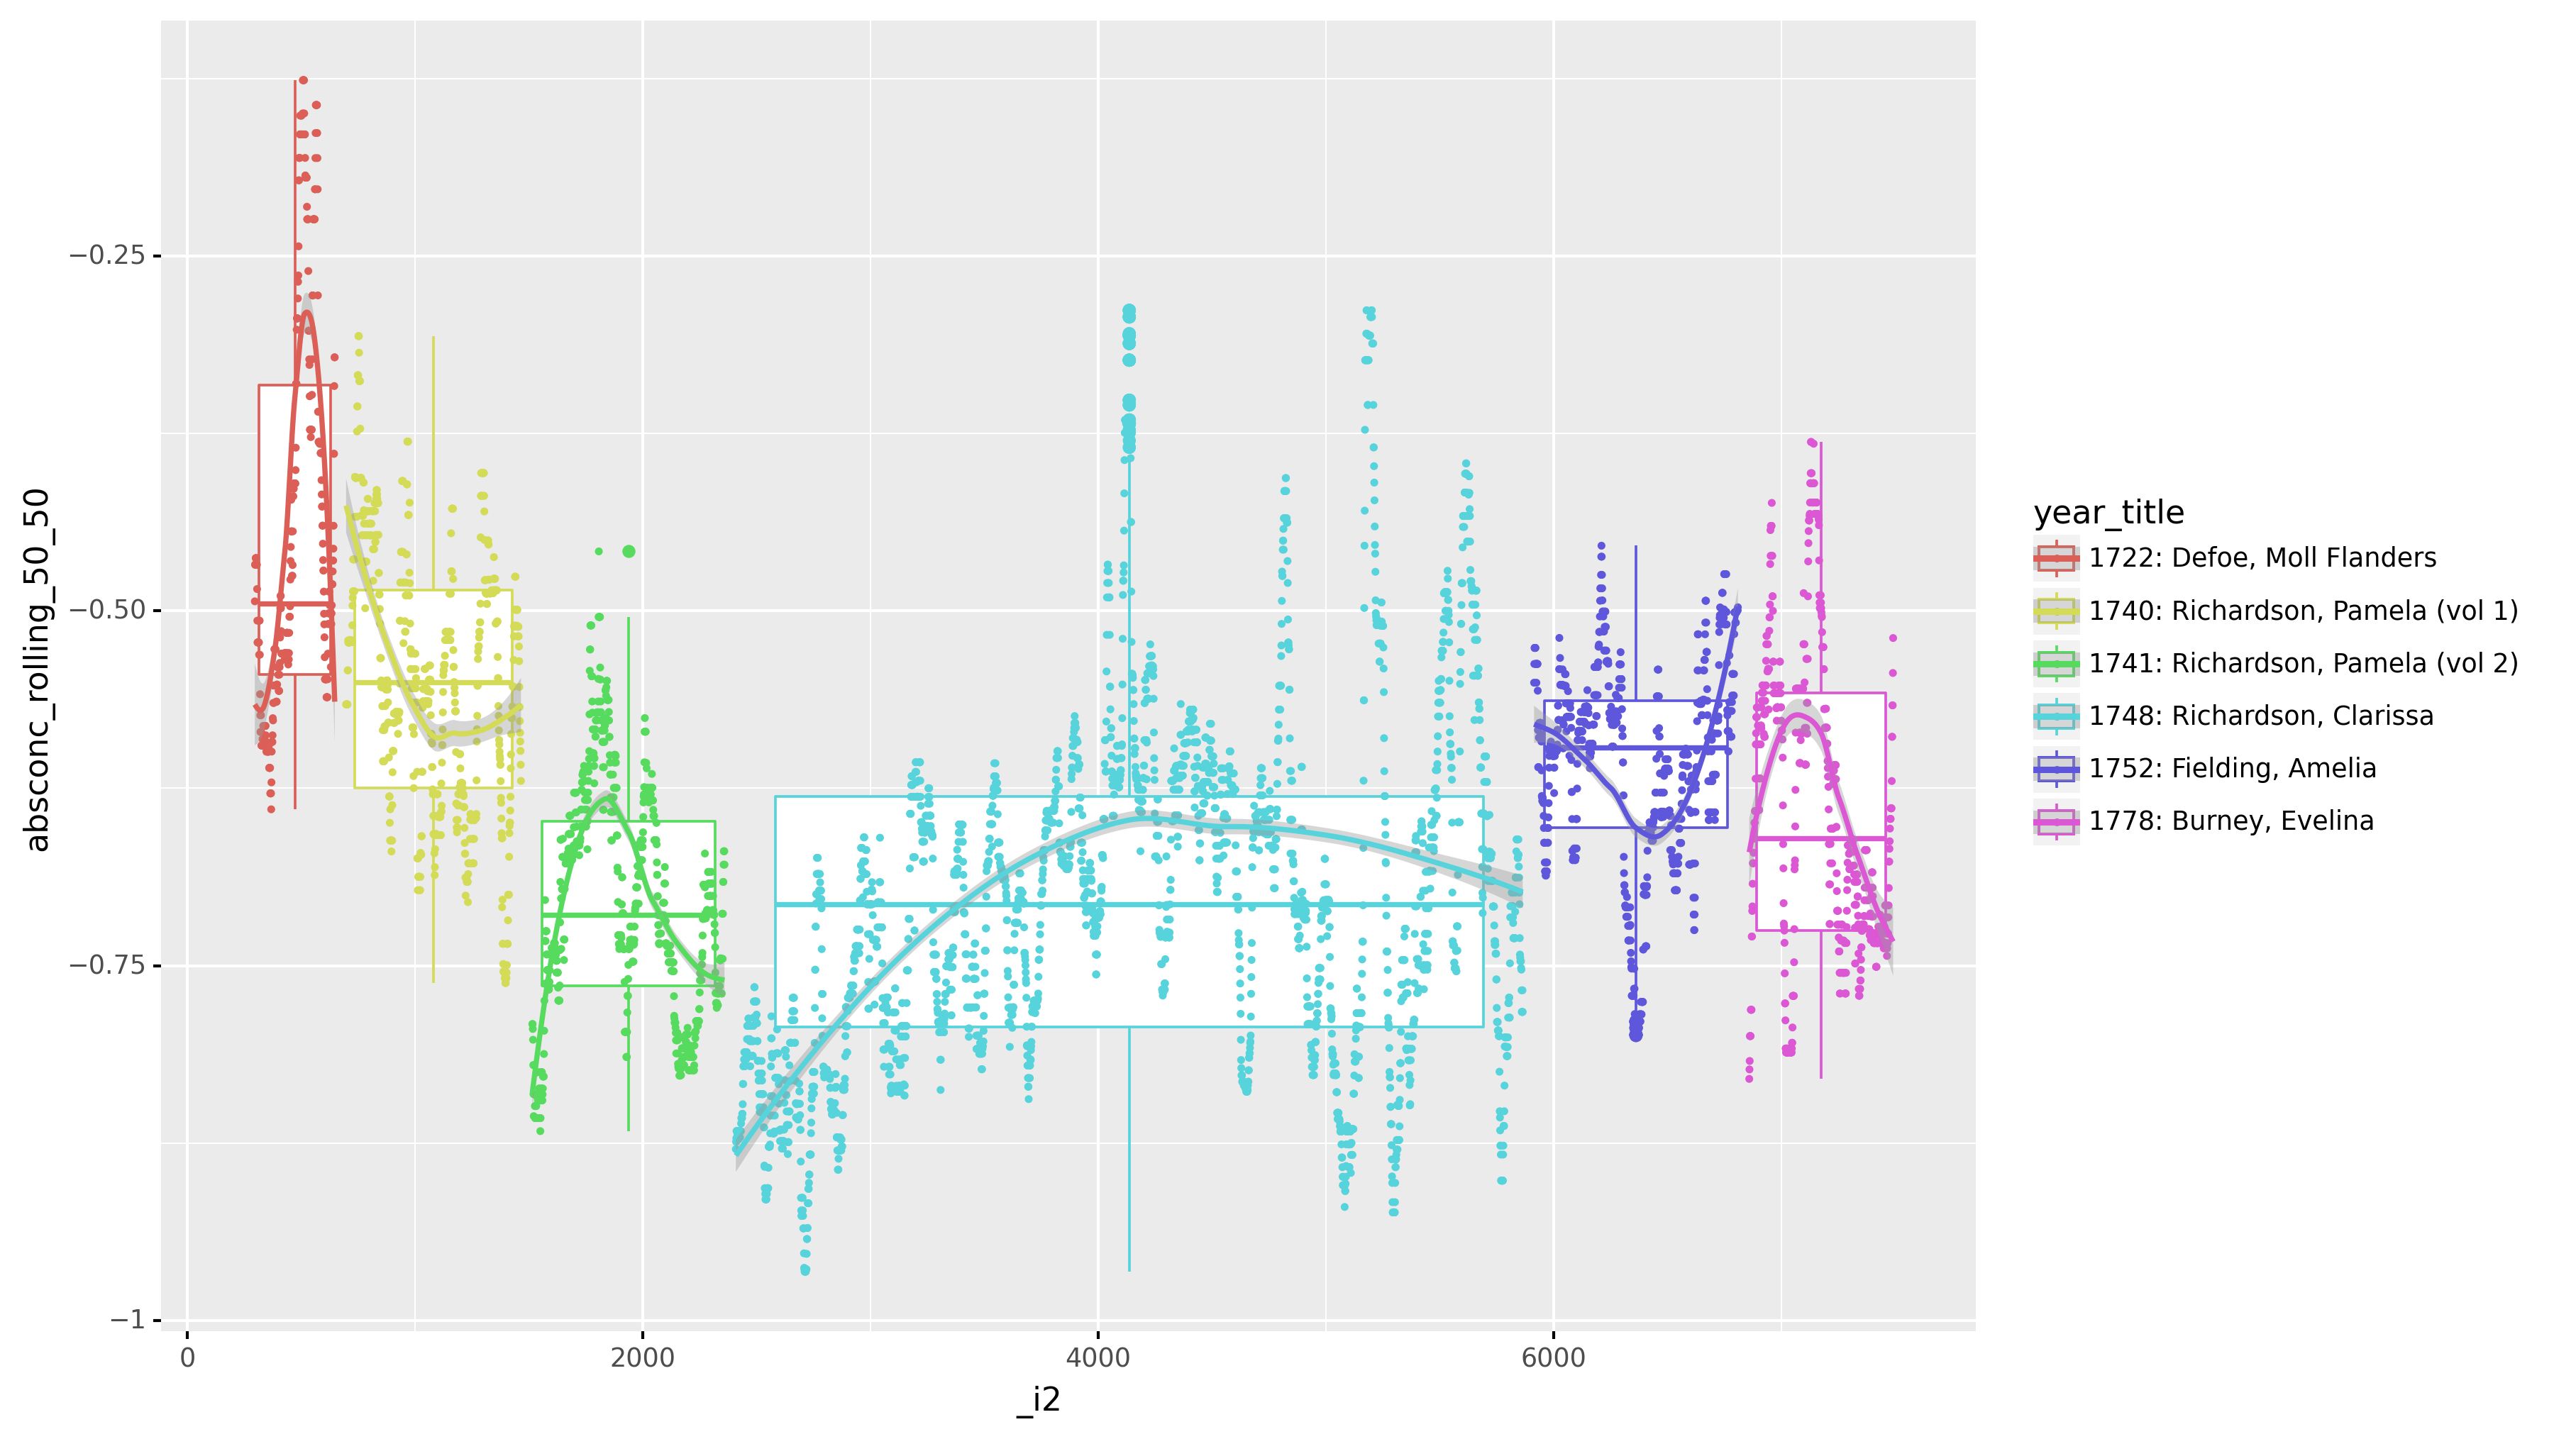

<ggplot: (730671960)>

In [156]:
p9.options.figure_size=11,8
figdf=odf.assign(year=pd.to_numeric(odf.year))
fig=p9.ggplot(figdf.query('1700<year<1800'), p9.aes(x='_i2',y='absconc_rolling_50_50',color='year_title'))
fig+=p9.geom_boxplot()
fig+=p9.geom_point(size=.5)
fig+=p9.geom_smooth(method='loess', span=1)
fig

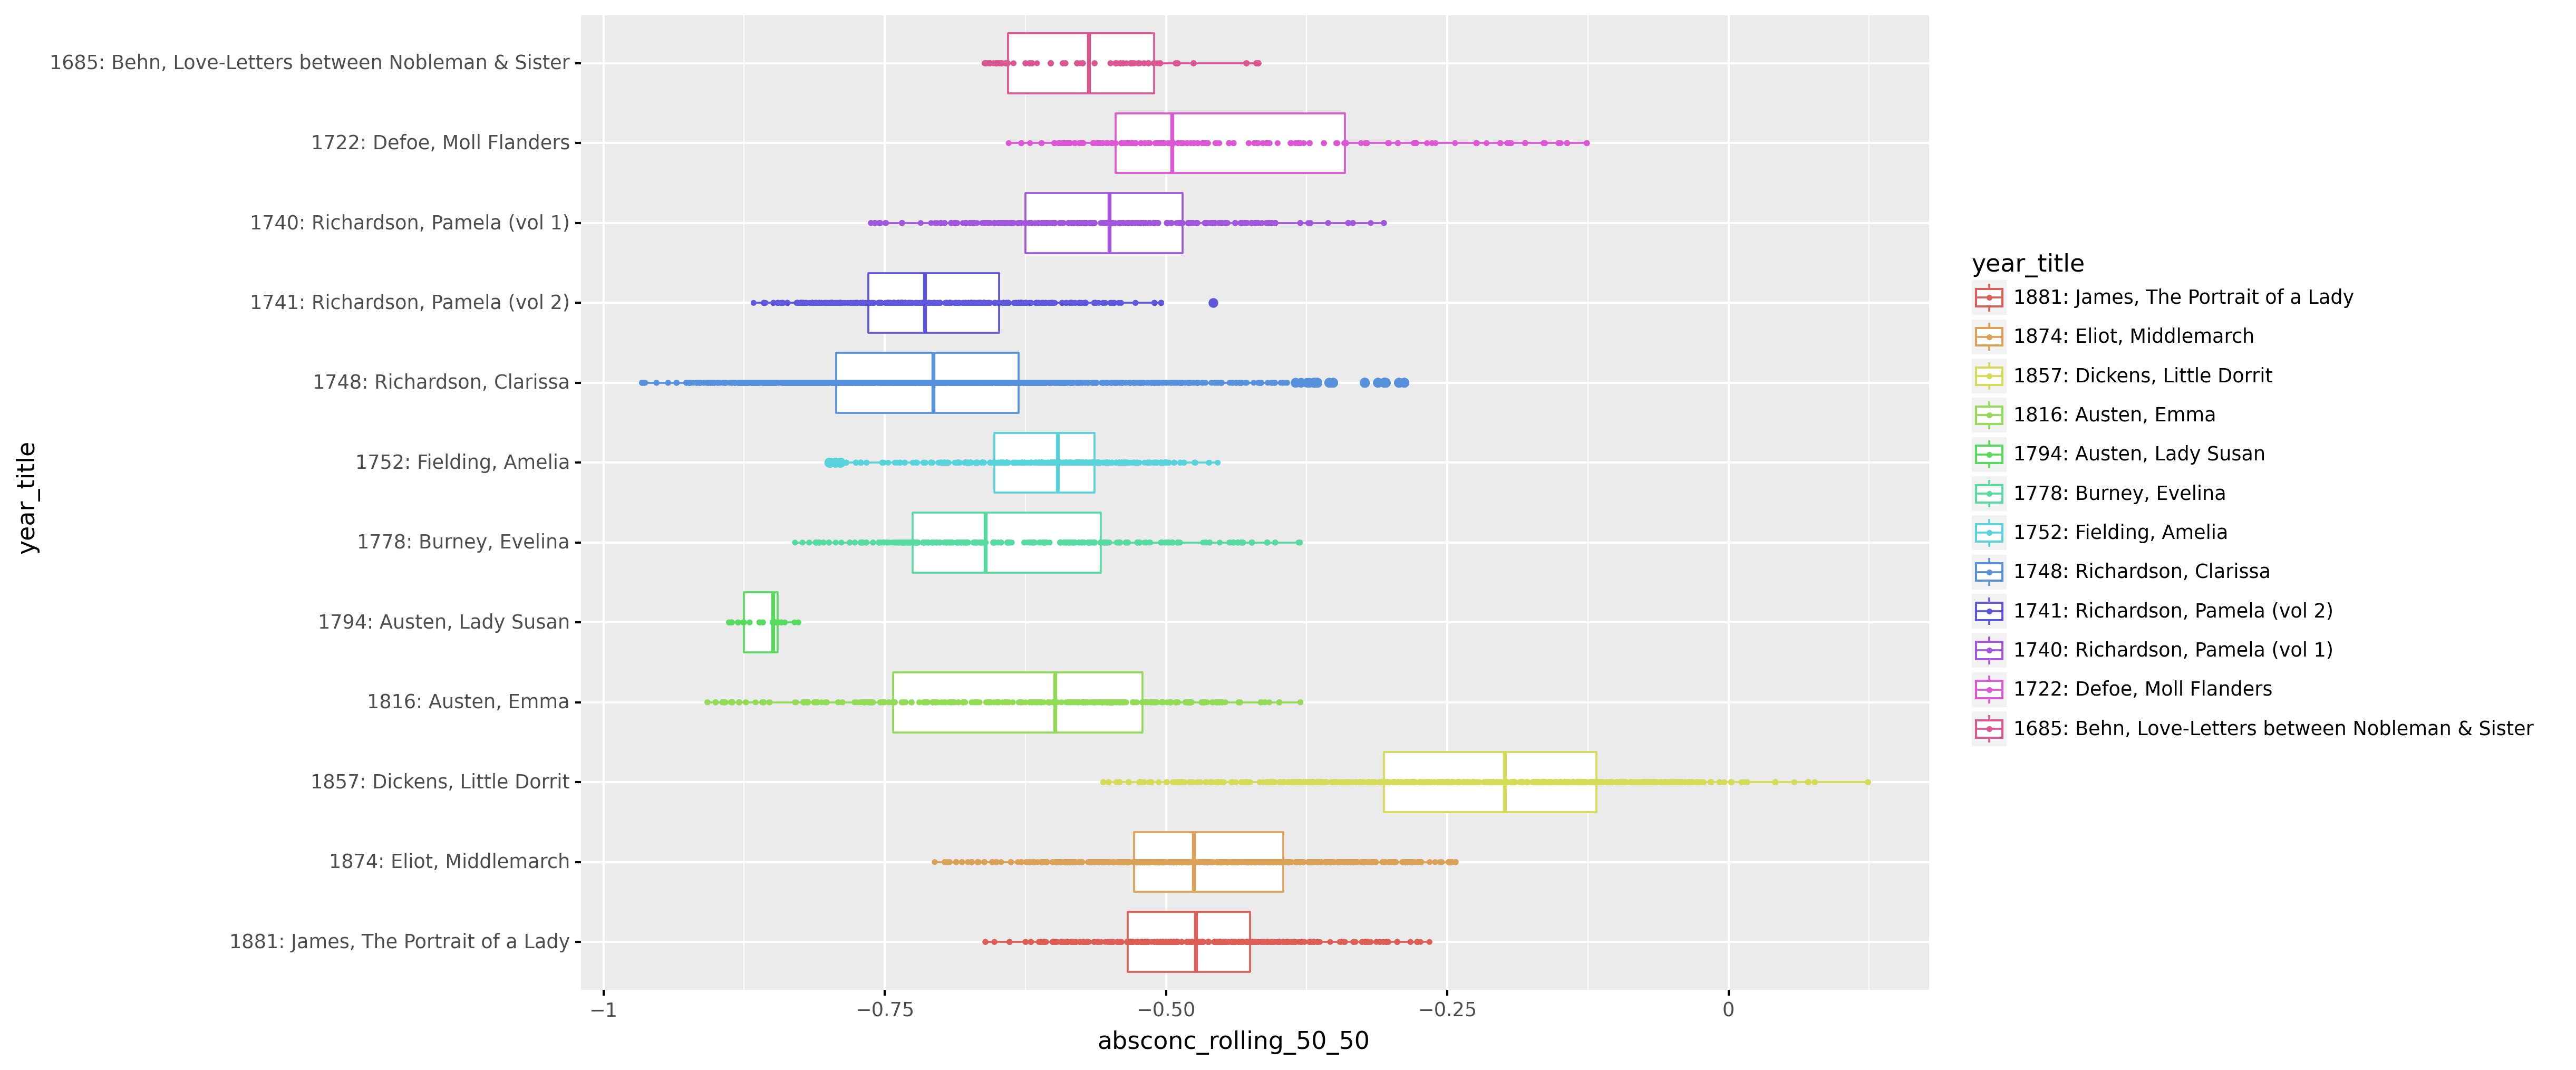

<ggplot: (755271313)>

In [146]:
p9.options.figure_size=11,8
figdf=odf.assign(year_title=pd.Categorical(odf.year_title, categories=sorted(list(set(odf.year_title)), reverse=True)))
fig=p9.ggplot(figdf, p9.aes(x='year_title',y='absconc_rolling_50_50',color='year_title'))
fig+=p9.geom_boxplot()
fig+=p9.geom_point(size=.5)
# fig+=p9.geom_smooth()
fig+=p9.coord_flip()
fig

In [34]:
o=pmap(get_tokens_absconc, )

para_i  sent_i  sent_token_i         token         lemma  \
text_id token_i                                                             
L001a   8             0       0             8          easy          easy   
        10            0       0            10     agreeable     agreeable   
        16            0       0            16        render        render   
        18            0       0            18       equally       equally   
        19            0       0            19    delightful    delightful   
...                 ...     ...           ...           ...           ...   
        420           9       2            51         judge         judge   
        423           9       2            54  Impartiality  impartiality   
        426           9       2            57        rarely        rarely   
        429           9       2            60           met          meet   
        433           9       2            64        Author        author   

                 onset  offset   pos pos2  deprel  head event      supersense  \
text_id token_i                                                                 
L001a   8           43      47   ADJ   JJ  advmod     2     O                   
        10          52      61   ADJ   JJ    conj     8     O                   
        16          81      87  VERB   VB    ROOT    16     O     verb.change   
        18          93     100   ADV   RB  advmod    19     O                   
        19         101     111   ADJ   JJ   ccomp    16     O                   
...                ...     ...   ...  ...     ...   ...   ...             ...   
        420       2118    2123  VERB   VB   xcomp   418     O  verb.cognition   
        423       2132    2144  NOUN   NN    pobj   421     O  noun.cognition   
        426       2154    2160   ADV   RB  advmod   425     O                   
        429       2167    2170  VERB  VBN   xcomp   425     O     verb.social   
        433       2182    2188  NOUN   NN    pobj   431     O     noun.person   

                char_id char_tok   absconc  _i  absconc_rolling_50_25  \
text_id token_i                                                         
L001a   8                        -0.886760   0                    NaN   
        10                       -1.124103   1                    NaN   
        16                       -1.331655   2                    NaN   
        18                       -1.301656   3                    NaN   
        19                       -0.263265   4                    NaN   
...                 ...      ...       ...  ..                    ...   
        420                      -1.556545  85              -0.952136   
        423                      -1.815594  86              -0.964647   
        426                      -0.243216  87              -0.979893   
        429                      -0.428958  88              -0.955655   
        433                      -1.218867  89              -0.954042   

                 absconc_rolling_50  
text_id token_i                      
L001a   8                 -0.886760  
        10                -1.005432  
        16                -1.114173  
        18                -1.161044  
        19                -0.981488  
...                             ...  
        420               -0.952136  
        423               -0.964647  
        426               -0.979893  
        429               -0.955655  
        433               -0.954042  

[90 rows x 19 columns]

In [30]:
odf.absconc.rolling(50,min_periods=25).mean()

text_id  token_i
L001a    8               NaN
         10              NaN
         16              NaN
         18              NaN
         19              NaN
                      ...   
         420       -0.952136
         423       -0.964647
         426       -0.979893
         429       -0.955655
         433       -0.954042
Name: absconc, Length: 90, dtype: float64

para_i  sent_i  sent_token_i         token         lemma  \
text_id token_i                                                             
L001a   8             0       0             8          easy          easy   
        10            0       0            10     agreeable     agreeable   
        16            0       0            16        render        render   
        18            0       0            18       equally       equally   
        19            0       0            19    delightful    delightful   
...                 ...     ...           ...           ...           ...   
        420           9       2            51         judge         judge   
        423           9       2            54  Impartiality  impartiality   
        426           9       2            57        rarely        rarely   
        429           9       2            60           met          meet   
        433           9       2            64        Author        author   

                 onset  offset   pos pos2  deprel  head event      supersense  \
text_id token_i                                                                 
L001a   8           43      47   ADJ   JJ  advmod     2     O                   
        10          52      61   ADJ   JJ    conj     8     O                   
        16          81      87  VERB   VB    ROOT    16     O     verb.change   
        18          93     100   ADV   RB  advmod    19     O                   
        19         101     111   ADJ   JJ   ccomp    16     O                   
...                ...     ...   ...  ...     ...   ...   ...             ...   
        420       2118    2123  VERB   VB   xcomp   418     O  verb.cognition   
        423       2132    2144  NOUN   NN    pobj   421     O  noun.cognition   
        426       2154    2160   ADV   RB  advmod   425     O                   
        429       2167    2170  VERB  VBN   xcomp   425     O     verb.social   
        433       2182    2188  NOUN   NN    pobj   431     O     noun.person   

                char_id char_tok   absconc  
text_id token_i                             
L001a   8                        -0.886760  
        10                       -1.124103  
        16                       -1.331655  
        18                       -1.301656  
        19                       -0.263265  
...                 ...      ...       ...  
        420                      -1.556545  
        423                      -1.815594  
        426                      -0.243216  
        429                      -0.428958  
        433                      -1.218867  

[90 rows x 16 columns]

In [7]:
df=pd.read_csv('data.abs_conc_pamela.txt',sep='\t')
df=df[df.id.str.contains('Richardson')]
df.id.value_counts()

chadwyck.Richardson.Clarissa_st_ed.1066    2309
Richardson.Pamela.Vol2                      580
Richardson.Pamela                           548
Name: id, dtype: int64

In [8]:
df['para_group']=df['para_i_all'].apply(lambda x: x//5*5)

In [9]:
df

,Unnamed: 0,abs-conc,abs/conc,abs/conc_HGI,abs/conc_MT,abs/conc_binary,count_abs,count_abs_binary,count_all,count_conc,count_conc_binary,count_neither,para,para_i,_llp_,id,para_i_all,para_group
0,0,28,15.000000,1.592593,1.441176,5.444444,30,49,100,2,9,68,"PAMELA, or VIRTUE REWARDED LETTER I DEAR FATHE...",0,canon_fiction|Richardson.Pamela,Richardson.Pamela,0,0
1,1,29,8.250000,1.051282,1.150000,2.937500,33,47,100,4,16,63,the housekeeper to give me mourning with the r...,1,canon_fiction|Richardson.Pamela,Richardson.Pamela,1,0
2,2,37,8.400000,1.666667,1.342105,6.400000,42,64,100,5,10,53,"and diligent; and do as you should do, and I l...",2,canon_fiction|Richardson.Pamela,Richardson.Pamela,2,0
3,3,45,12.250000,1.633333,1.000000,7.750000,49,62,100,4,8,47,"word! that he would be kind to you, if you wou...",3,canon_fiction|Richardson.Pamela,Richardson.Pamela,3,0
4,4,37,6.285714,1.289474,1.200000,6.777778,44,61,100,7,9,49,"it up in a rag among the thatch, over the wind...",4,canon_fiction|Richardson.Pamela,Richardson.Pamela,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,2304,69,NaN,2.000000,1.923077,26.666667,69,80,100,0,3,31,"have succeeded, in which the Favourites of the...",2304,canon_fiction|chadwyck.Richardson.Clarissa_st_...,chadwyck.Richardson.Clarissa_st_ed.1066,3432,3430
3433,2305,62,63.000000,1.769231,1.653846,16.200000,63,81,100,1,5,36,to the Genius of our Writers.’ Thus far Mr. Ad...,2305,canon_fiction|chadwyck.Richardson.Clarissa_st_...,chadwyck.Richardson.Clarissa_st_ed.1066,3433,3430
3434,2306,77,NaN,3.615385,3.222222,NaN,77,85,100,0,0,23,unhappily: Yet the Writer of the History of Cl...,2306,canon_fiction|chadwyck.Richardson.Clarissa_st_...,chadwyck.Richardson.Clarissa_st_ed.1066,3434,3430
3435,2307,65,NaN,1.720000,1.085714,79.000000,65,79,100,0,1,35,HEAVEN only could reward (d) [Footnote d: 1Kb]...,2307,canon_fiction|chadwyck.Richardson.Clarissa_st_...,chadwyck.Richardson.Clarissa_st_ed.1066,3435,3435


/Users/ryan/miniforge3/lib/python3.9/site-packages/plotnine/layer.py:402: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


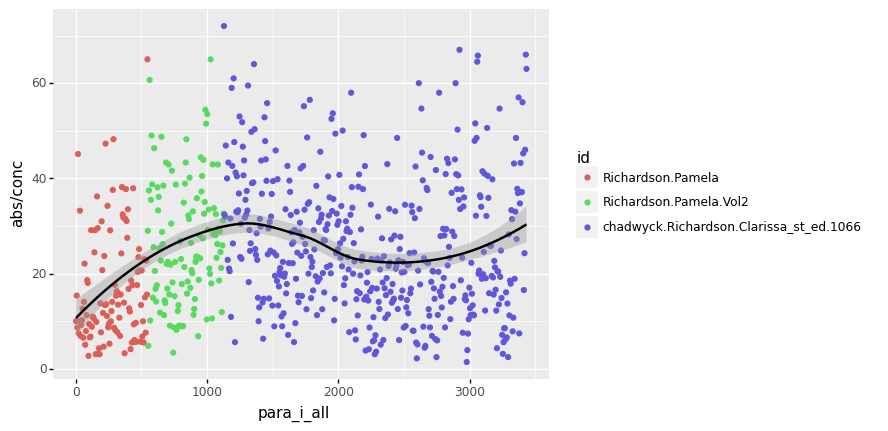

<ggplot: (693320349)>

In [11]:

(
    p9.ggplot(df.groupby(['id','para_group']).mean().reset_index(), p9.aes(x='para_i_all',y='abs/conc',color='id'))
    + p9.geom_point() 
    + p9.stat_smooth(p9.aes(x='para_i_all',y='abs/conc'),inherit_aes=False) 
    # + p9.scale_y_log10(limits=(3,30))
)